# data processing:
## installing and importing needed python library's, and the data:

In [68]:
import sys
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.special


url = "https://docs.google.com/spreadsheets/d/1H-2dgSCb3EgCMEgXDOtoJ5ol9Lt1lmAeXistsCpbJ44/export?format=csv&gid=0"

df = pd.read_csv(url)
print (df)

        naam    achternaam  leeftijd      Klas  reactiesnelheid kleur  \
0       Roef      de Groot        15       h4d                    254   
1      Elaya  van Woggelum        16       h4b                    413   
2       Ties        Koster        16       h5c                    351   
3       Marc         Leroy        16       h5c                    291   
4       Leon      Sleurink        32    docent                    255   
5     Lyanne         Ykema        17       h5c                    277   
6      Johan  van Heuzelen        42  top klas                    343   
7     Vesper    Rijsenbrij        14      AT3O                    208   
8    Madhura    Mahashabde        14      AT3n                    326   
9      Jayda          Tjin        15       H4a                    205   
10       Isa        Schrik        17       v6b                    348   
11  Jessica       bremmers        32    docent                    408   
12    Khalid        Gerash        18       V6b     

## making function to calculate correlation and p-value, to be used by graphs

In [55]:
def numberWithoutRounding(num, precision=3):
    [beforeDecimal, afterDecimal] = str(num).split('.')
    return beforeDecimal + '.' + afterDecimal[0:precision]

def corrsys(df):
    mask = df.notna().to_numpy()
    corr = df.corr().to_numpy()
    n_rows, n_cols = df.shape

    # Initialize the return arrays for better performance
    length = int(n_cols * (n_cols - 1) / 2)
    correl = np.empty(length, dtype=np.float64)
    count = np.empty(length, dtype=np.uint64)

    # For 2-combination of columns, let `n` be the number of pairs whose
    # elements are all non-NaN. We will need that later to calculate the
    # p-value
    k = -1
    for i in range(n_cols):
        for j in range(i):
            n = 0
            for row in range(n_rows):
                n += 1 if mask[row, i] and mask[row, j] else 0

            k += 1
            correl[k] = corr[i,j]
            count[k] = n
            

    # The p-value can be obtained with the incomplete Beta function (betainc)
    alpha = count / 2 - 1
    x = (correl + 1) / 2
    x = np.where(correl < 0, x, 1 - x)
    p = 2 * scipy.special.betainc(alpha, alpha, x)

    return(correl[0], p[0])

In [56]:
def scatter(dfx, dfy, xtitle = "x", ytitle = "y", title = ""):
    x = df[dfx]
    y = df[dfy]
    # assemble matrix A
    A = np.vstack([x, np.ones(len(x))]).T

    correlation,pv =corrsys(df[[dfx, dfy]])
    # Direct least square regression
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

    # plot the results
    plt.figure(figsize = (10,8))
    plt.scatter(x, y, color='b')
    plt.plot(x, alpha[0]*x + alpha[1], 'r')
    plt.suptitle(title)
    plt.title(f'correlatiecoefficiënt = {numberWithoutRounding(correlation)}, p-waarde = {numberWithoutRounding(pv)}')
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

In [57]:
def scatter_moz(dfx, dfy, axs, xtitle = "x", ytitle = "y", on = "error"):
    axis = on
    x = df[dfx]
    y = df[dfy]
    # assemble matrix A
    A = np.vstack([x, np.ones(len(x))]).T

    correlation,pv =corrsys(df[[dfx, dfy]])
    # Direct least square regression
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

    # plot the results
    axis[axs].scatter(x, y, color='b')
    axis[axs].plot(x, alpha[0]*x + alpha[1], 'r')
    axis[axs].set_title(f'correlatiecoefficiënt = {numberWithoutRounding(correlation)}, p-waarde = {numberWithoutRounding(pv)}')
    axis[axs].set_xlabel(xtitle)
    axis[axs].set_ylabel(ytitle)

## visualising:
### plotting the scatterplots:


In [58]:
# scatter("reactiesnelheid geluid", "reactiesnelheid kleur",  xtitle="reactiesnelheid geluid(ms)",        ytitle="reactiesnelheid kleur(ms)", title="correlatie tussen de reactiesnelheden")
# scatter("reactiesnelheid kleur", "avg tijd",                xtitle="reactiesnelheid kleur(ms)",         ytitle="gemmiddelde racetijd(s)",   title="correlatie tussen racetijden en reactiesnelheid kleur")
# scatter("rea gem", "avg tijd",                              xtitle="gemmiddelde reactiesnelheid(ms)",   ytitle="gemiddelde racetijd(s)",    title="correlatie tussen racetijden en gemmiddelde reactiesnelheid")
# scatter("reactiesnelheid geluid", "avg tijd",               xtitle="reactiesnelheid geluid(ms)",        ytitle="gemmiddelde racetijd(s)",   title="correlatie tussen racetijden en reactiesnelheid geluid")

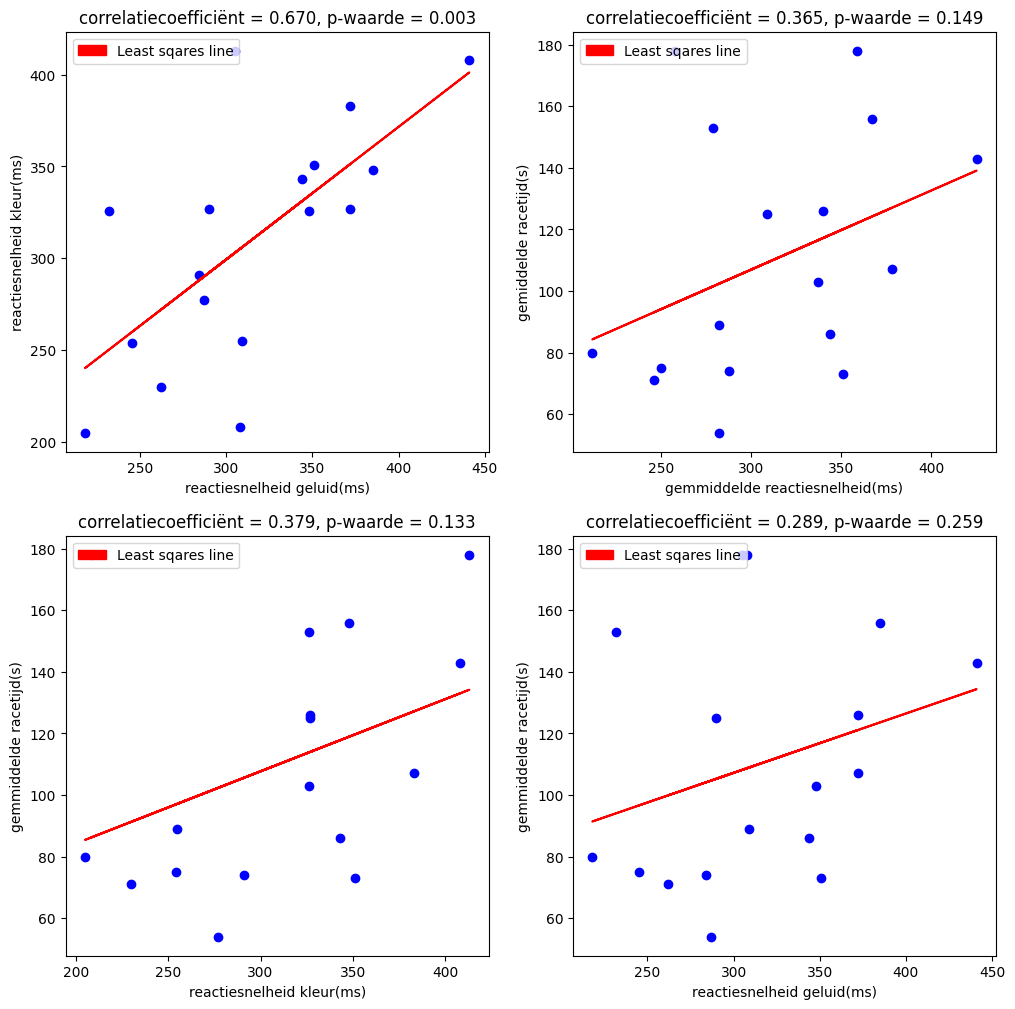

In [78]:
x = [['A', 'B'],
     ['C', 'D']]
fig, axis = plt.subplot_mosaic(x, figsize=(12,12))

least_sq = mpatches.Patch(color='red', label='Least sqares line')

scatter_moz("reactiesnelheid geluid", "reactiesnelheid kleur", "A",  xtitle="reactiesnelheid geluid(ms)",        ytitle="reactiesnelheid kleur(ms)", on= axis)


scatter_moz("reactiesnelheid kleur", "avg tijd", "C",                xtitle="reactiesnelheid kleur(ms)",         ytitle="gemmiddelde racetijd(s)", on= axis)
scatter_moz("rea gem", "avg tijd", "B",                              xtitle="gemmiddelde reactiesnelheid(ms)",   ytitle="gemiddelde racetijd(s)", on= axis)
scatter_moz("reactiesnelheid geluid", "avg tijd", "D",               xtitle="reactiesnelheid geluid(ms)",        ytitle="gemmiddelde racetijd(s)", on= axis)

axis["A"].legend(handles=[least_sq], loc=2)
axis["B"].legend(handles=[least_sq], loc=2)
axis["C"].legend(handles=[least_sq], loc=2)
axis["D"].legend(handles=[least_sq], loc=2)

## the maths:
### calculating the correlation and p-value:

#### formula for calculating the correlationcoëfficiënt:

given values:

$$ alpha = \frac{\text{count}}{2} -1 $$
 
$$ x = \frac{\text{correl} + 1}{2} $$

we can calculate the $p$-value using scipi:

$$ p = 2 \times \text{scipy.special.betainc(alpha, alpha, x)} $$

which internally uses the formula:

$$ p = 2 \times \int_0^\text{x} t^{\text{alpha} -1}(1-t)^{\text{alpha} - 1} , dt $$

### function for calculating everything:


In [60]:


def corr1(df):
    mask = df.notna().to_numpy()
    corr = df.corr().to_numpy()
    n_rows, n_cols = df.shape

    # Initialize the return arrays for better performance
    length = int(n_cols * (n_cols - 1) / 2)
    correl = np.empty(length, dtype=np.float64)
    count = np.empty(length, dtype=np.uint64)

    # For 2-combination of columns, let `n` be the number of pairs whose
    # elements are all non-NaN. We will need that later to calculate the
    # p-value
    k = -1
    for i in range(n_cols):
        for j in range(i):
            n = 0
            for row in range(n_rows):
                n += 1 if mask[row, i] and mask[row, j] else 0

            k += 1
            correl[k] = corr[i,j]
            count[k] = n
            

    # The p-value can be obtained with the incomplete Beta function (betainc)
    alpha = count / 2 - 1
    x = (correl + 1) / 2
    x = np.where(correl < 0, x, 1 - x)
    p = 2 * scipy.special.betainc(alpha, alpha, x)

    confidence = numberWithoutRounding(100 - ((p[0])*100), precision= 2)
    col_a, col_b = df.columns
    print(f"Data van het vergelijken van {col_a} en {col_b}:")
    print(f'De bevonden correlatiecoëfficiënt is: {numberWithoutRounding(correl[0])}. ')
    print(f'En een bevonden p waarde van: {numberWithoutRounding(p[0])}.')
    print(f"Er is dus een {confidence}% kans dat er een correlatie is.")
    if p <= 0.05:
        print("Deze bevindingen zijn statistisch significant.")
    else:
        print("Helaas zijn de bevindingen niet statistisch significant.")
    print("")
    print("")
    


### calling the function with different data sets:

In [61]:
corr1(df[['reactiesnelheid geluid','reactiesnelheid kleur']])
corr1(df[['reactiesnelheid geluid','avg tijd']])
corr1(df[['reactiesnelheid kleur','avg tijd']])
corr1(df[["leeftijd", 'avg tijd']])
corr1(df[["leeftijd", "reactiesnelheid kleur"]])
corr1(df[["leeftijd", "reactiesnelheid geluid"]])

Data van het vergelijken van reactiesnelheid geluid en reactiesnelheid kleur:
De bevonden correlatiecoëfficiënt is: 0.670. 
En een bevonden p waarde van: 0.003.
Er is dus een 99.67% kans dat er een correlatie is.
Deze bevindingen zijn statistisch significant.


Data van het vergelijken van reactiesnelheid geluid en avg tijd:
De bevonden correlatiecoëfficiënt is: 0.289. 
En een bevonden p waarde van: 0.259.
Er is dus een 74.01% kans dat er een correlatie is.
Helaas zijn de bevindingen niet statistisch significant.


Data van het vergelijken van reactiesnelheid kleur en avg tijd:
De bevonden correlatiecoëfficiënt is: 0.379. 
En een bevonden p waarde van: 0.133.
Er is dus een 86.69% kans dat er een correlatie is.
Helaas zijn de bevindingen niet statistisch significant.


Data van het vergelijken van leeftijd en avg tijd:
De bevonden correlatiecoëfficiënt is: -0.110. 
En een bevonden p waarde van: 0.671.
Er is dus een 32.84% kans dat er een correlatie is.
Helaas zijn de bevindingen niet st

## credits:
### function to calculate p-value and correlation:
https://stackoverflow.com/questions/64682256/how-to-calculate-a-correlation-with-p-values-most-performant-in-python
by: https://stackoverflow.com/users/2538939/code-different
### rounding function:
https://stackoverflow.com/questions/60250522/how-to-show-exactly-4-numbers-after-decimal-point-without-rounding-in-python
by: https://stackoverflow.com/users/4091874/caseygrun